In [1]:
import pandas as pd
df = pd.read_csv("ecommerce_analysis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   Gender                 55000 non-null  object 
 2   Age                    55000 non-null  object 
 3   Product Category       55000 non-null  object 
 4   Discount Availed       55000 non-null  object 
 5   Discount Amount (INR)  55000 non-null  float64
 6   Gross Amount           55000 non-null  float64
 7   Purchase Method        55000 non-null  object 
 8   Location               55000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.8+ MB


In [2]:
df.head()

,CID,Gender,Age,Product Category,Discount Availed,Discount Amount (INR),Gross Amount,Purchase Method,Location
0,943146,Female,25,Electronics,Yes,64.30,725.304000,Credit Card,Ahmedabad
1,180079,Male,25,Electronics,Yes,175.19,4638.991875,Credit Card,Bangalore
2,337580,Other,60,Clothing,Yes,211.54,1986.372575,Credit Card,Delhi
3,180333,Other,60,Sports & Fitness,No,0.00,5695.612650,Debit Card,Delhi
4,447553,Male,18,Sports & Fitness,Yes,439.92,2292.651500,Credit Card,Delhi


In [6]:
groupby = df.groupby("Location")
groupby.groups

{'Ahmedabad': [0, 16, 18, 45, 87, 145, 147, 156, 162, 169, 194, 203, 211, 212, 214, 220, 244, 263, 265, 298, 306, 378, 401, 406, 424, 443, 457, 465, 471, 476, 570, 573, 604, 610, 614, 617, 622, 689, 716, 718, 726, 744, 751, 775, 818, 825, 827, 856, 865, 866, 884, 900, 915, 924, 945, 955, 973, 1041, 1071, 1079, 1135, 1162, 1212, 1230, 1232, 1235, 1245, 1259, 1270, 1305, 1324, 1338, 1339, 1376, 1378, 1400, 1428, 1475, 1485, 1489, 1499, 1508, 1515, 1522, 1525, 1557, 1568, 1580, 1584, 1597, 1598, 1624, 1694, 1703, 1728, 1755, 1809, 1816, 1826, 1945, ...], 'Bangalore': [1, 9, 28, 41, 42, 49, 50, 54, 55, 56, 57, 66, 68, 77, 89, 92, 105, 109, 113, 121, 123, 124, 130, 131, 134, 136, 137, 144, 175, 183, 185, 189, 210, 215, 218, 236, 267, 269, 271, 275, 281, 290, 296, 300, 305, 317, 319, 322, 324, 339, 341, 347, 358, 364, 372, 373, 386, 392, 393, 395, 396, 398, 402, 408, 421, 423, 425, 427, 434, 435, 437, 440, 454, 460, 468, 469, 474, 478, 490, 492, 502, 507, 509, 515, 516, 517, 518, 535, 545, 5

In [8]:
groupby.get_group("Delhi")

,CID,Gender,Age,Product Category,Discount Availed,Discount Amount (INR),Gross Amount,Purchase Method,Location
2,337580,Other,60,Clothing,Yes,211.54,1986.372575,Credit Card,Delhi
3,180333,Other,60,Sports & Fitness,No,0.00,5695.612650,Debit Card,Delhi
4,447553,Male,18,Sports & Fitness,Yes,439.92,2292.651500,Credit Card,Delhi
5,200614,Male,18,Clothing,Yes,127.01,3649.397400,Credit Card,Delhi
6,668787,Male,25,Electronics,No,0.00,5593.935600,PhonePe UPI,Delhi
...,...,...,...,...,...,...,...,...,...
54976,116349,Female,18,Beauty and Health,Yes,199.55,5461.544000,Debit Card,Delhi
54978,299659,Male,45,Clothing,No,0.00,5295.544150,PhonePe UPI,Delhi
54982,636391,Other,45,Clothing,No,0.00,2586.474000,International Card,Delhi
54988,566532,Male,45,Clothing,No,0.00,2182.424400,Net Banking,Delhi


In [9]:
groupby = df.groupby(["Location", "Gender"])

for name, group in groupby:
    print (name)
    print (group)

('Ahmedabad', 'Female')
          CID  Gender Age   Product Category Discount Availed  \
0      943146  Female  25        Electronics              Yes   
87     133782  Female  25  Beauty and Health              Yes   
147    794530  Female  45           Clothing              Yes   
169    558320  Female  45  Beauty and Health              Yes   
203    528736  Female  18  Beauty and Health              Yes   
...       ...     ...  ..                ...              ...   
54820  921316  Female  18  Beauty and Health              Yes   
54850  287315  Female  25              Books               No   
54852  271283  Female  18   Sports & Fitness               No   
54919  311740  Female  45     Home & Kitchen               No   
54925  414021  Female  18  Beauty and Health               No   

       Discount Amount (INR)  Gross Amount   Purchase Method   Location  
0                      64.30    725.304000       Credit Card  Ahmedabad  
87                    333.51   3805.203150     

In [10]:
counts = df.groupby("Location")["CID"].count()
counts

Location
Ahmedabad     2785
Bangalore     8249
Chennai       4368
Dehradun       553
Delhi        10799
Hyderabad     5545
Jaipur        1678
Kolkata       2709
Lucknow       1136
Mumbai       11197
Other         1046
Pune          3781
Srinagar       548
Varanasi       606
Name: CID, dtype: int64

In [16]:
df["Gender"] = df["Gender"].replace("Other", "Unknown")

In [17]:
df["Gender"].unique()


array(['Female', 'Male', 'Unknown'], dtype=object)

In [18]:
counts_gender = df.groupby(["Location", "Gender"]) ["CID"].count()
counts_gender

Location   Gender 
Ahmedabad  Female      930
           Male        921
           Unknown     934
Bangalore  Female     2616
           Male       2783
           Unknown    2850
Chennai    Female     1492
           Male       1467
           Unknown    1409
Dehradun   Female      176
           Male        178
           Unknown     199
Delhi      Female     3661
           Male       3528
           Unknown    3610
Hyderabad  Female     1881
           Male       1814
           Unknown    1850
Jaipur     Female      586
           Male        521
           Unknown     571
Kolkata    Female      910
           Male        865
           Unknown     934
Lucknow    Female      392
           Male        374
           Unknown     370
Mumbai     Female     3763
           Male       3738
           Unknown    3696
Other      Female      364
           Male        298
           Unknown     384
Pune       Female     1301
           Male       1216
           Unknown    1264
Srinagar 

In [20]:
amount = df.groupby(["Location"])["Gross Amount"].mean()
amount

Location
Ahmedabad    3049.118803
Bangalore    3000.865171
Chennai      3030.982087
Dehradun     2976.837371
Delhi        3014.301641
Hyderabad    2990.630271
Jaipur       3036.945980
Kolkata      3018.945533
Lucknow      3011.874054
Mumbai       3004.093956
Other        3079.007968
Pune         3018.385658
Srinagar     3023.861748
Varanasi     3007.737739
Name: Gross Amount, dtype: float64

In [26]:
groups = df.groupby(['Location']).agg(numbers=('CID', 'count'), Mean_Amount=('Gross Amount','mean'), Sum_Amount=('Gross Amount','sum'))
groups

,numbers,Mean_Amount,Sum_Amount
Location,,,
Ahmedabad,2785,3049.118803,8.491796e+06
Bangalore,8249,3000.865171,2.475414e+07
Chennai,4368,3030.982087,1.323933e+07
Dehradun,553,2976.837371,1.646191e+06
Delhi,10799,3014.301641,3.255144e+07
Hyderabad,5545,2990.630271,1.658304e+07
Jaipur,1678,3036.945980,5.095995e+06
Kolkata,2709,3018.945533,8.178323e+06
Lucknow,1136,3011.874054,3.421489e+06


In [25]:
groups.sort_values(by=["Sum_Amount"], ascending=False)

,Mean_Amount,Sum_Amount,numbers
Location,,,
Mumbai,3004.093956,3.363684e+07,11197
Delhi,3014.301641,3.255144e+07,10799
Bangalore,3000.865171,2.475414e+07,8249
Hyderabad,2990.630271,1.658304e+07,5545
Chennai,3030.982087,1.323933e+07,4368
Pune,3018.385658,1.141252e+07,3781
Ahmedabad,3049.118803,8.491796e+06,2785
Kolkata,3018.945533,8.178323e+06,2709
Jaipur,3036.945980,5.095995e+06,1678


In [29]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [30]:
correl = df[["Age", "Gross Amount", "Discount Amount (INR)"]]
correlations = correl.corr(method='pearson')
correlations

,Age,Gross Amount,Discount Amount (INR)
Age,1.000000,0.000057,0.007343
Gross Amount,0.000057,1.000000,0.001473
Discount Amount (INR),0.007343,0.001473,1.000000


In [31]:
import matplotlib.pyplot as plt

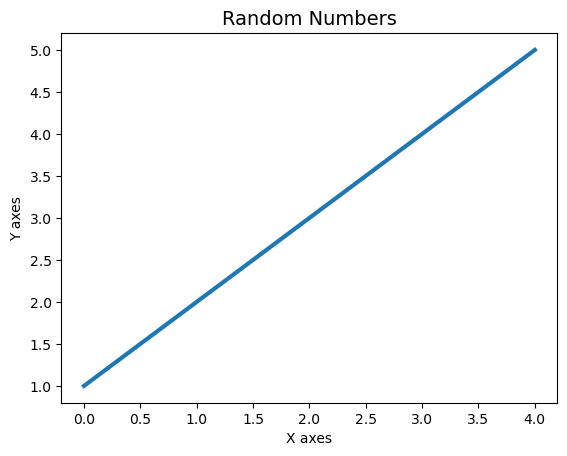

In [39]:
data = [1,2,3,4,5]
plt.plot(data, linewidth=3)

plt.title("Random Numbers", fontsize=14)
plt.xlabel("X axes", fontsize=10)
plt.ylabel("Y axes", fontsize=10)
plt.show()

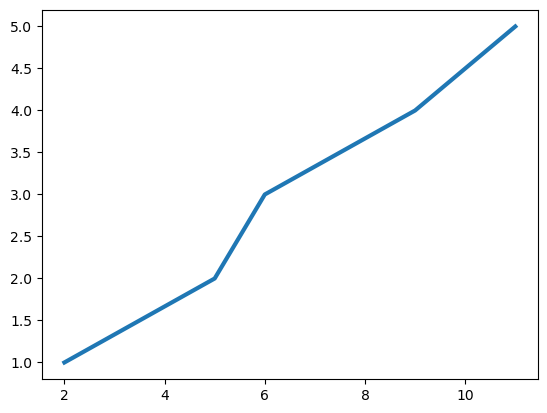

In [40]:
xValues = [2,5,6, 9, 11]
plt.plot(xValues ,data, linewidth=3)

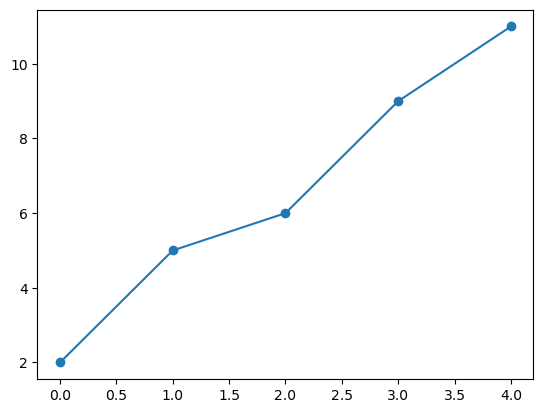

In [41]:
xValues = [2,5,6, 9, 11]
plt.plot(xValues, marker = 'o')
plt.show()
    

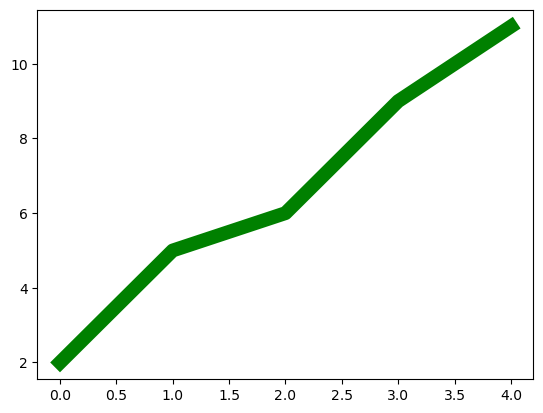

In [43]:
plt.plot(xValues, color = 'green', linewidth = '10')
plt.show()

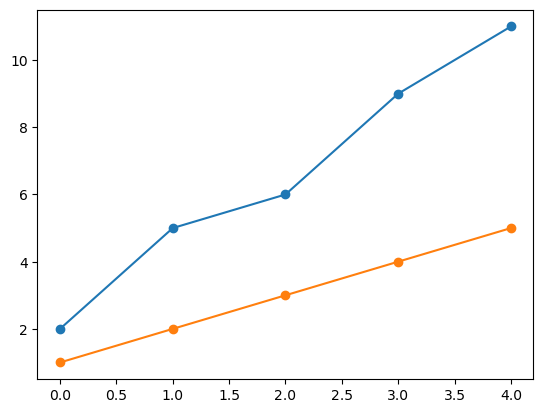

In [44]:
xValues = [2,5,6,9,11]
yValues = [1,2,3,4,5]

plt.plot(xValues, marker ='o')
plt.plot(yValues, marker ='o')

plt.show()